# Goal
It is your job to predict the sales price for each house. For each Id in the test set, you must predict the value of the SalePrice variable. 

In [84]:
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, ShuffleSplit
from sklearn.preprocessing import StandardScaler, LabelEncoder

warnings.filterwarnings("ignore")

pd.set_option('display.max_rows', 30)

In [85]:
# load the train and test sets
df_train = pd.read_csv('~/notebooks/data/kaggle/houseprices/train.csv')
df_test = pd.read_csv('~/notebooks/data/kaggle/houseprices/test.csv')

In [86]:
# check for nulls
df_train.info()

# drop any null columns for now - brute force to get started
df_train.dropna(axis='columns' ,inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

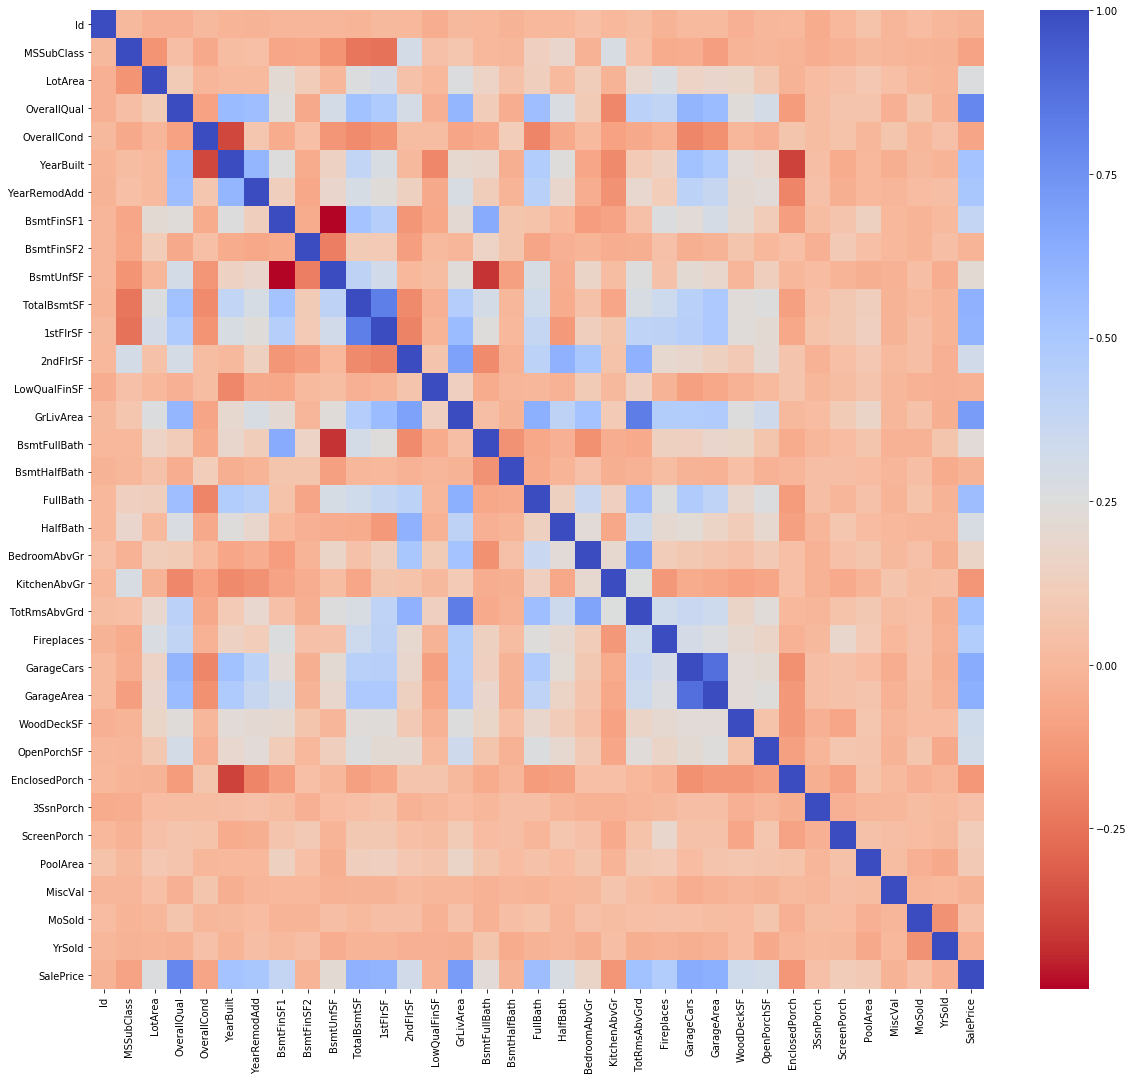

In [88]:
# Look at the correlation between the values

f, (ax1) = plt.subplots(1, 1, figsize=(20,18))

# Entire DataFrame
corr = df_train.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)

In [89]:
df_train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Id,1460,NaN,NaN,NaN,730.5,421.61,1,365.75,730.5,1095.25,1460
MSSubClass,1460,NaN,NaN,NaN,56.8973,42.3006,20,20,50,70,190
MSZoning,1460,5,RL,1151,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotArea,1460,NaN,NaN,NaN,10516.8,9981.26,1300,7553.5,9478.5,11601.5,215245
Street,1460,2,Pave,1454,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
MoSold,1460,NaN,NaN,NaN,6.32192,2.70363,1,5,6,8,12
YrSold,1460,NaN,NaN,NaN,2007.82,1.3281,2006,2007,2008,2009,2010
SaleType,1460,9,WD,1267,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SaleCondition,1460,6,Normal,1198,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
# label encode all the categorical values
df_train = df_train.apply(LabelEncoder().fit_transform)
cols = df_train.columns

# scale all the values
scalar = StandardScaler()
scaled = scalar.fit_transform(df_train)

df_train = pd.DataFrame(scaled, columns=cols)

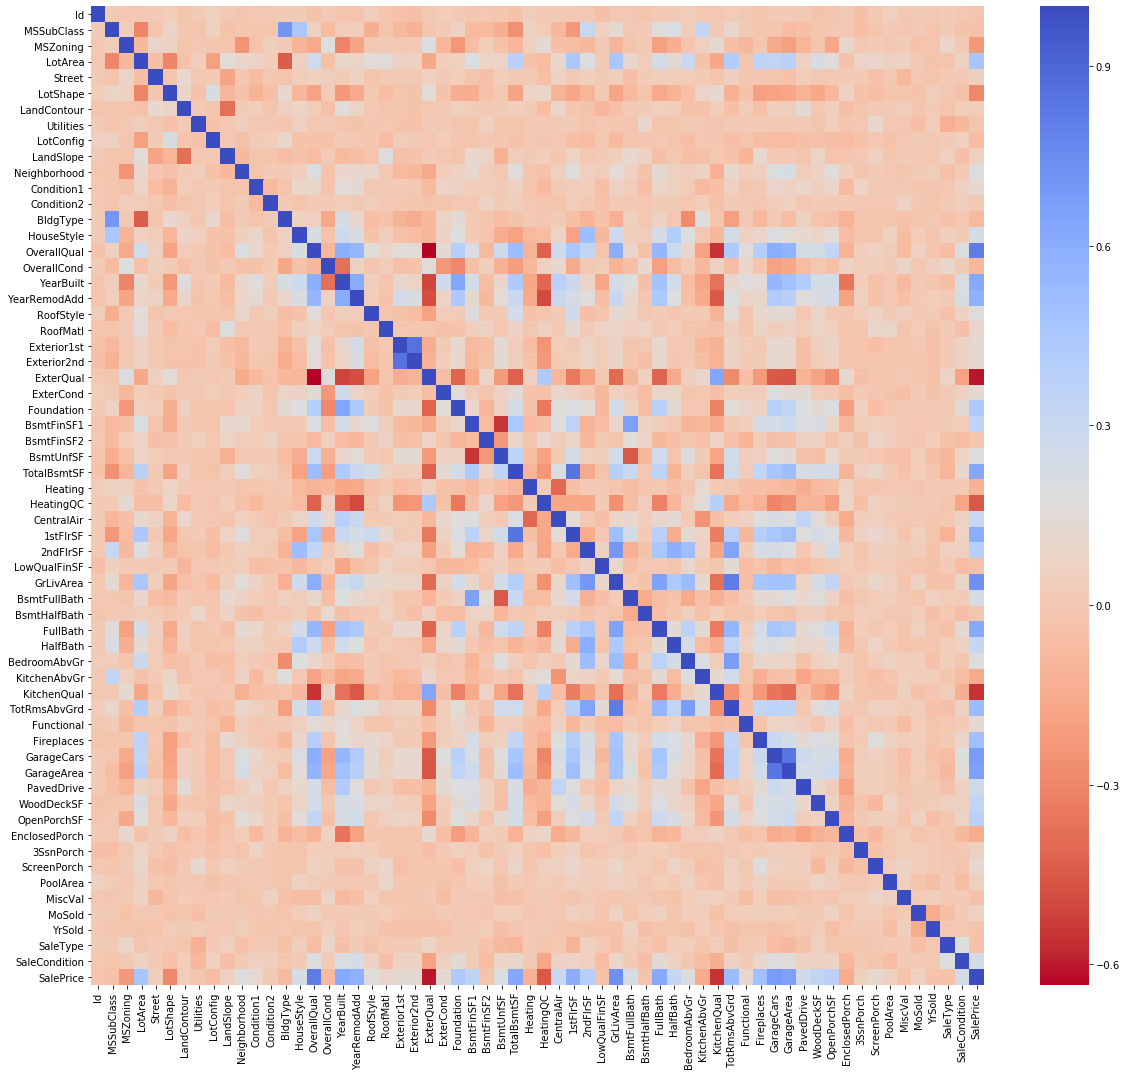

In [91]:
# Look at the correlation between the values

f, (ax1) = plt.subplots(1, 1, figsize=(20,18))

# Entire DataFrame
corr = df_train.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)

In [94]:
X_train, X_test = train_test_split(df_train)

In [131]:
X = X_train.drop(['SalePrice'], axis=1)
y = X_train['SalePrice']

X_test = X_train.drop(['SalePrice'], axis=1)
y_test = X_train['SalePrice']

In [168]:
# try some basic linear regression
from sklearn.linear_model import LinearRegression, Ridge, Lars, Lasso, ElasticNet, BayesianRidge, PassiveAggressiveRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [165]:
reg = LinearRegression()
reg.fit(X,y)

y_pred = reg.predict(X)
y_test_pred = reg.predict(X_test)

print('-'*100)
print('Mean Accuracy: ', round(1-mean_absolute_error(y,y_pred),3))
print('Mean Squared Error: ', round(mean_squared_error(y,y_pred),3))
print('R2: ', round(r2_score(y,y_pred),3))
print('-'*100)

----------------------------------------------------------------------------------------------------
Mean Accuracy:  0.803
Mean Squared Error:  0.073
R2:  0.926
----------------------------------------------------------------------------------------------------


In [169]:
reg = PassiveAggressiveRegressor()
reg.fit(X,y)

y_pred = reg.predict(X)
y_test_pred = reg.predict(X_test)

print('-'*100)
print('Mean Accuracy: ', round(1-mean_absolute_error(y,y_pred),3))
print('Mean Squared Error: ', round(mean_squared_error(y,y_pred),3))
print('R2: ', round(r2_score(y,y_pred),3))
print('-'*100)


----------------------------------------------------------------------------------------------------
Mean Accuracy:  0.737
Mean Squared Error:  0.12
R2:  0.879
----------------------------------------------------------------------------------------------------


(1095,)

ValueError: continuous format is not supported